# Santander Customer Transaction Prediction

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train_path =r"E:\Santander\train.csv"
test_path =r"E:\Santander\test.csv"

In [3]:
train = pd.read_csv(train_path)
train = pd.DataFrame(train)

test = pd.read_csv(test_path)
test = pd.DataFrame(test)

train.shape,test.shape

((200000, 202), (200000, 201))

In [4]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [5]:
train.dropna(inplace=True)
print("Total Number of Non Blank Rows:",train.shape[0])

train.isnull().sum()

Total Number of Non Blank Rows: 200000


ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [6]:
#Target
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [7]:
X=train.drop(columns=['target','ID_code'])
y=train['target']

In [8]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=100)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [10]:
y_pred_rfc=rfc.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.8994833333333333


In [13]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=100)

# Fit the model to generate the data.
_X, _Y = sm.fit_resample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(_Y), pd.DataFrame(_X)], axis=1)


In [14]:
oversampled['target'].value_counts()

1    125933
0    125933
Name: target, dtype: int64

<!-- from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3)
x_train.shape, y_train.shape,x_test.shape,y_test.shape -->

## MLP Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense
# Create the MLP model
model = Sequential() # create empty model and then add layers
model.add(Dense(128, input_dim=200, activation='relu',name ='Input')) #Dense layers with the ReLU (relu) activation function nonlinearity
model.add(Dense(64, activation='relu',name ='Hidden_Layer'))
model.add(Dense(1,activation='sigmoid',name ='Output')) #Prediction layer with sigmoid activation function

# Compile the model
model.compile( loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               25728     
                                                                 
 Hidden_Layer (Dense)        (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', patience=10, mode='max', restore_best_weights=True)
plot = model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stop])

Epoch 1/100
4375/4375 [==============================] - 9s 2ms/step - loss: 0.2775 - accuracy: 0.9028
Epoch 2/100
4375/4375 [==============================] - 9s 2ms/step - loss: 0.2551 - accuracy: 0.9076
Epoch 3/100
4375/4375 [==============================] - 8s 2ms/step - loss: 0.2501 - accuracy: 0.9095
Epoch 4/100
4375/4375 [==============================] - 9s 2ms/step - loss: 0.2479 - accuracy: 0.9093
Epoch 5/100
4375/4375 [==============================] - 8s 2ms/step - loss: 0.2467 - accuracy: 0.9101
Epoch 6/100
4375/4375 [==============================] - 8s 2ms/step - loss: 0.2452 - accuracy: 0.9104
Epoch 7/100
4375/4375 [==============================] - 8s 2ms/step - loss: 0.2441 - accuracy: 0.9106
Epoch 8/100
4375/4375 [==============================] - 8s 2ms/step - loss: 0.2427 - accuracy: 0.9111
Epoch 9/100
4375/4375 [==============================] - 8s 2ms/step - loss: 0.2420 - accuracy: 0.9117
Epoch 10/100
4375/4375 [==============================] - 9s 2ms/step - l

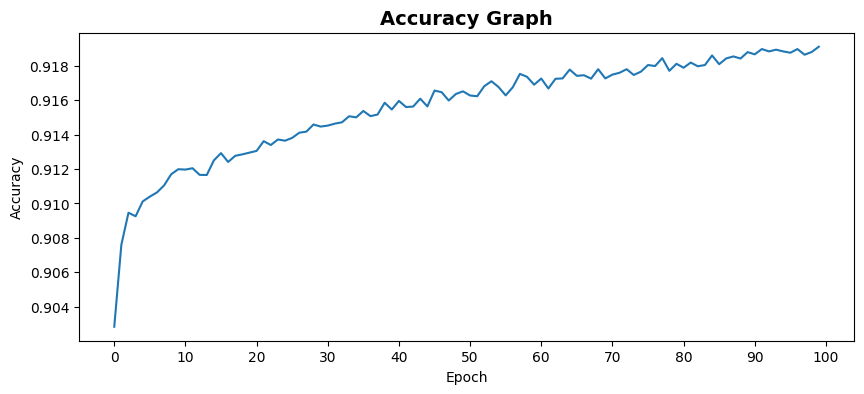

In [17]:
plt.figure(figsize = (10,4))
plt.title("Accuracy Graph", fontsize = 14, fontweight = "bold")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(0,210, 10))
plt.plot(plot.epoch, plot.history["accuracy"])
plt.show()

In [18]:
y_pred = model.predict(X_test)

1875/1875 [==============================] - 3s 1ms/step
